In [1]:
import csv
import numpy as np
import random

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.lines import Line2D
import matplotlib.animation as animation

In [2]:
#Put Data into Arrays (TEST ONLY)

tag_list = []
x_coord_list = []
y_coord_list = []
idea_list = []
solartype_list = []

cnt = 0

with open('buildings_data.csv', mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    for row in csv_reader:
        
        tag_list.append(row["building_code"])
        x_coord_list.append(float(row["building_coord_x"]))
        y_coord_list.append(float(row["building_coord_y"]))
        idea_list.append((random.random()*2)-1)
        solartype_list.append(random.randrange(0, 3, 1))
        
        cnt+=1
        
print("We have",cnt,"agents (buildings)")

We have 4919 agents (buildings)


In [3]:
# --------------------------
# COLOURED MAP PLOT FUNCTION
# --------------------------
#
# DESCRIPTION: it creates a colored scatter-plot maps from 3 vectors: x positions, y positions and
#              the quantity of interest (color vector).
#
# INPUT ARGUMENTS
#
# -x_axis      -> vector with x-coordinates
# -y_axis      -> vector with y-coordinates
# -col_axis    -> vector with color coordinates (data of interest)
#
# -col_range   -> range (min,max) of the color values
# -x_label     -> label that will appear on the x-axis
# -y_label     -> label that will appear on the y-axis
#
# -colorbar    -> 1 for plot with colorbar, 0 for plot with legend (continuous colors vs discrete colors)
# -Nlegend     -> Number of entries of the legend (only relevant if colorbar=0)
# -color_label -> List with the labels to insert into the colorbar/legend. If colorbar=1 the number of
#                 entries must be equal to Nlegend
#
# -title       -> Title that will appear on the graph
# -size        -> Size of the graph (x,y)
# -cmap        -> Color map being used
# -markersize  -> Size of the markers for the Scatter plot
# -save        -> 1 if the image must be saved into a .svg file
# -filename    -> Name that will be given to the image file
#
# OUTPUT ARGUMENTS (only required if animation is used)
#
# -fig         -> Pointer to figure generated
# -scatter     -> Pointer to scatter plot generated

def ColourMap(x_axis, y_axis, col_axis, col_range=(0,1), x_label="X_label", y_label="Y_label", colorbar=1, Nlegend=3, color_label=['Low', 'Medium', 'High'], title="Title", size=(15,10),cmap='RdYlGn',markersize=5,save=0,filename="test.svg"):

    #Configure Scatter Plot
    fig = plt.figure(figsize=size)
    plt.title(title, fontsize=16)
    plt.xlabel(y_label, fontsize=8)
    plt.ylabel(x_label, fontsize=8)
    
    #Create Scatter Plot
    scatter = plt.scatter(x_axis,y_axis, c=col_axis, cmap=cmap, marker='s',s=markersize, vmin=col_range[0], vmax=col_range[1])
    
    #Setup Colorbar
    if(colorbar==1):
        min_col = col_range[0]+0.001
        max_col = col_range[1]-0.001
        cbar = plt.colorbar(ticks=[min_col, 0.5*(min_col+max_col), max_col])
        cbar.ax.set_yticklabels(color_label)
        
    #Alternatively, setup Legend
    else:
        
        viridis = cm.get_cmap(cmap, Nlegend)
        
        legend_elements = []
        
        for i in range(0,Nlegend):
            legend_elements.append(Line2D([0],[0], marker='s', color='w', label=color_label[i],markerfacecolor=viridis(i), markersize=15))
        
        plt.legend(handles=legend_elements, loc='lower left')
    
    #Save image if requested
    if(save==1):
        plt.savefig(filename, format='svg')
    
    #Return values for animation
    return fig, scatter

(<Figure size 1080x720 with 2 Axes>,
 <matplotlib.collections.PathCollection at 0x7ff49cc07650>)

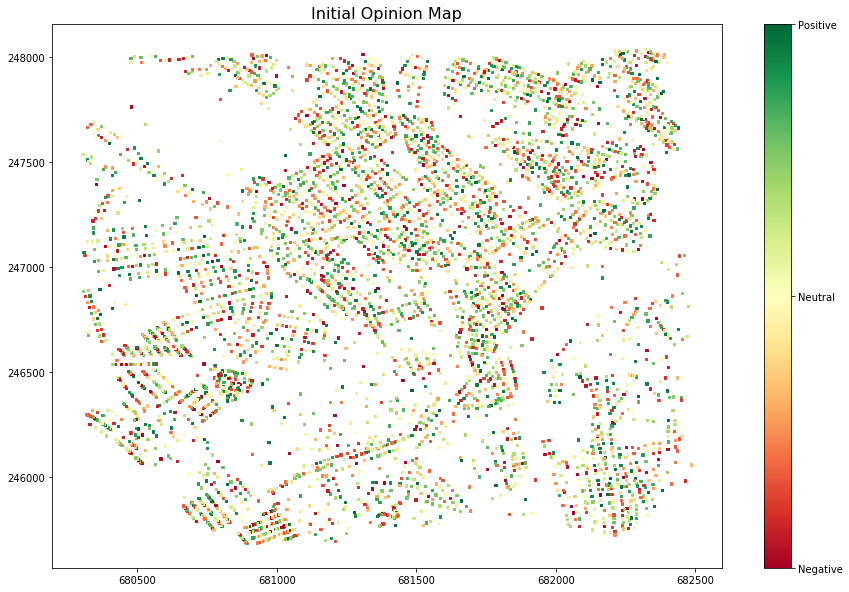

In [4]:
#Plot ColoredMap
ColourMap(x_coord_list,y_coord_list,idea_list,col_range=(-1,1),x_label="",y_label="",color_label=['Negative','Neutral','Positive'],cmap='RdYlGn',title="Initial Opinion Map", save=1)

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.collections.PathCollection at 0x7ff49cb8ad90>)

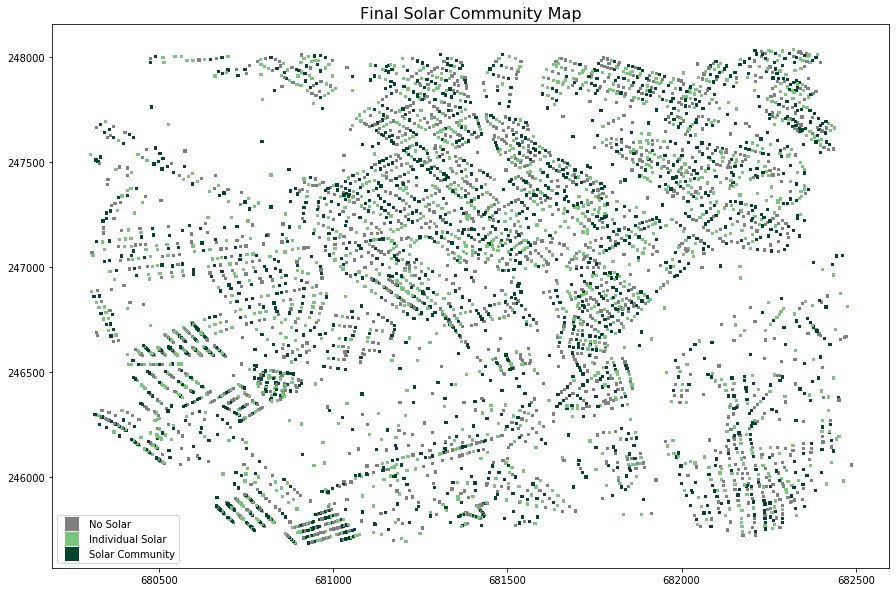

In [5]:
# Make 0=>Grey (Style choice)
cmap = 'YlGn'
viridis = cm.get_cmap(cmap, 3)
newcolors = viridis(np.linspace(0, 1, 3))
pink = np.array([128/256, 128/256, 128/256, 1])
newcolors[:1,:] = pink
newcmp = ListedColormap(newcolors)

#Plot ColoredMap
ColourMap(x_coord_list,y_coord_list,solartype_list,col_range=(0,2),x_label="",y_label="",colorbar=0,Nlegend=3,color_label=['No Solar','Individual Solar','Solar Community'],cmap=newcmp,title="Final Solar Community Map")

In [6]:
# Auxiliary function to create the Animation
def update_plot(i, data, scat, dlyfactor):
    k = int(i/dlyfactor)
    scat.set_array(data[k])
    return scat,

# --------------------------
# COLOURED MAP ANIMATION FUNCTION
# --------------------------
#
# DESCRIPTION: it generates a .gif file from a series of coloured maps.
#              NOTE: it does not display the animation, but the .gif is correctly created.
#              Look at the file to see the output, not at the image displayed.
#
# INPUT ARGUMENTS
#
# -numframes   -> number of frames of the animation (aka number of iterations)
#
# -x_axis      -> vector with x-coordinates
# -y_axis      -> vector with y-coordinates
# -col_matrix  -> 2D array with the color coordinates of all iterations (data of interest)
#
# -dlyfactor   -> delay factor to scale up the time between frames of the .gif
#
# (the following arguments are inherited from ColourMap())
#
# -col_range   -> range (min,max) of the color values
# -x_label     -> label that will appear on the x-axis
# -y_label     -> label that will appear on the y-axis
#
# -colorbar    -> 1 for plot with colorbar, 0 for plot with legend (continuous colors vs discrete colors)
# -Nlegend     -> Number of entries of the legend (only relevant if colorbar=0)
# -color_label -> List with the labels to insert into the colorbar/legend. If colorbar=1 the number of
#                 entries must be equal to Nlegend
#
# -title       -> Title that will appear on the graph
# -size        -> Size of the graph (x,y)
# -cmap        -> Color map being used
# -markersize  -> Size of the markers for the Scatter plot
# -filename    -> Name that will be given to the .gif file
#

def AnimateColourMap(numframes, x_axis, y_axis, col_matrix, dlyfactor=1, col_range=(0,1), x_label="X_label", y_label="Y_label", colorbar=1, Nlegend=3, color_label=['Low', 'Medium', 'High'], title="Title", size=(15,10),cmap='RdYlGn',markersize=5,filename="test.gif"):
        
    #Implement the initial figure
    fig, scatter = ColourMap(x_axis, y_axis, col_matrix[0], col_range=col_range, x_label=x_label, y_label=y_label, colorbar=colorbar, Nlegend=Nlegend, color_label=color_label, title=title, size=size, cmap=cmap, markersize=markersize, save=0)
        
    #Create animation and save .gif
    ani = animation.FuncAnimation(fig, update_plot, frames=range(int(numframes*dlyfactor)),fargs=(col_matrix, scatter, dlyfactor),blit=True)
    ani.save(filename, writer='imagemagick')

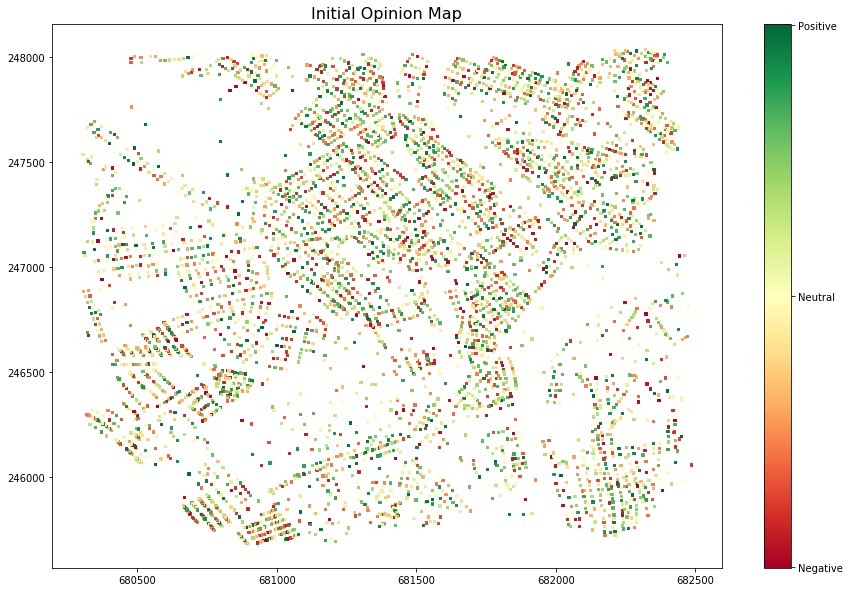

In [7]:
#Example with data
AnimateColourMap(3,x_coord_list,y_coord_list,np.random.random((3,np.size(x_coord_list))),dlyfactor=2,x_label="",y_label="",color_label=['Negative','Neutral','Positive'],cmap='RdYlGn',title="Initial Opinion Map")

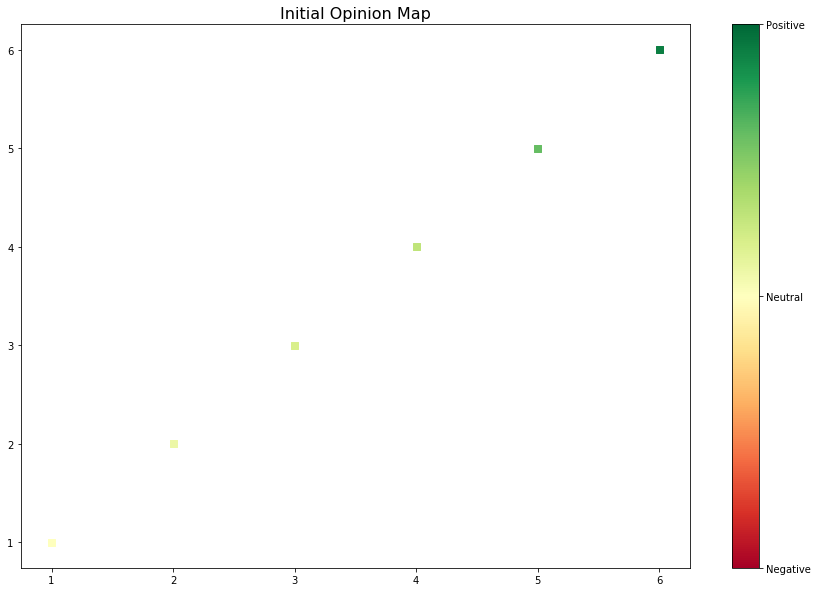

In [8]:
#Simpler example with vectors
x_c = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
y_c = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]

w = np.array([[0.0, 0.0, 0.00 , 0.0, 0.0,0.0],
                [0.0, 0.0, 0.00 , 0.0, 0.0,10.0],
                [0.0, 0.0, 0.00 , 0.0, 10.0,11.0],
                [0.0, 0.0, 0.00 , 10.0, 11.0,12.0],
                [0.0, 0.0, 10.00 , 11.0, 12.0,10.0],
                [10.0, 11.0, 12.00 , 13.0, 16.0,19.0]])


AnimateColourMap(6,x_c,y_c,w,col_range=(0.0,20.0),dlyfactor=2,x_label="",y_label="",color_label=['Negative','Neutral','Positive'],cmap='RdYlGn',title="Initial Opinion Map", markersize = 50)